<a href="https://colab.research.google.com/github/HuyHoangLe0201/VQC-DGA/blob/main/QRL_4busgrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pylatexenc
!pip install qiskit==1.4.2
!pip install qiskit_machine_learning
!pip install qiskit_aer
!pip install qiskit_algorithms
!pip install matplotlib
!pip install pandas
!pip install gym==0.26.2
!pip install numpy==1.23.5
!pip install scikit_learn
!pip install openpyxl
!pip install scipy
!pip install networkx
!pip install cma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 859.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=fb9591dd3988f30f9760f7f1a1a910306dcc23e148792926440fcc4722c84682
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 906.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 428.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 50.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is in

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 2.6 MB/s eta 0:00:00


In [4]:
!pip install pandapower
!pip install numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 665.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Generate PF dataset for pandapower simple_four_bus_system
Author: Lê Huy Hoàng – 2025‑07‑29
"""

import numpy as np
import pandas as pd
import pandapower as pp
import pandapower.networks as pn

# ======  THAM SỐ  ===========================================================
N_SAMPLES      = 1_000       # Số kịch bản cần sinh
LOAD_SCALE_MIN = 0.60        # 60 %
LOAD_SCALE_MAX = 1.10        # 110 %
OUT_CSV        = "fourbus_pf_dataset.csv"
RANDOM_SEED    = 42
# ===========================================================================

rng = np.random.default_rng(RANDOM_SEED)

records = []

for k in range(N_SAMPLES):
    # 1) Tạo bản sao lưới
    net = pn.simple_four_bus_system()      # 4 bus, 4 đường dây

    # 2) Scale tải ngẫu nhiên
    scale = rng.uniform(LOAD_SCALE_MIN, LOAD_SCALE_MAX, size=len(net.load))
    net.load["p_mw"] *= scale
    net.load["q_mvar"] *= scale

    # 3) Chạy power‑flow
    pp.runpp(net, calculate_voltage_angles=True, trafo_model="pi")

    # 4) Lưu kết quả
    #    (a) Bus voltage & angle
    for bus_idx, row in net.res_bus.iterrows():
        records.append({
            "scenario" : k,
            "bus"      : bus_idx,
            "vm_pu"    : row.vm_pu,
            "va_degree": row.va_degree,
            # (b) tổng P/Q tải sau scale (tiện cho RL)
            "p_load_mw": net.load.loc[net.load.bus==bus_idx, "p_mw"].sum(),
            "q_load_mvar": net.load.loc[net.load.bus==bus_idx, "q_mvar"].sum(),
        })
    #  (c) Line loading & losses (mỗi kịch bản ghi 1 bản tóm tắt)
    records.append({
        "scenario" : k,
        "bus"      : -1,    # -1 để phân biệt bản tóm tắt lưới
        "vm_pu"    : np.nan,
        "va_degree": np.nan,
        "p_load_mw": net.res_line.loading_percent.mean(),  # % loading TB
        "q_load_mvar": net.res_line.pl_mw.sum()            # tổn thất toàn mạng (MW)
    })

# 5) Xuất CSV
df = pd.DataFrame(records)
df.to_csv(OUT_CSV, index=False)
print(f"Đã sinh {N_SAMPLES} kịch bản → lưu tại {OUT_CSV!r}")


Đã sinh 1000 kịch bản → lưu tại 'fourbus_pf_dataset.csv'


  1 | ε=0.050 | loss=0.0000 | succ=1.00
>>> Early‑stop: success_rate = 1.0!

Train wall‑clock 13.6s | best loss 0.0000


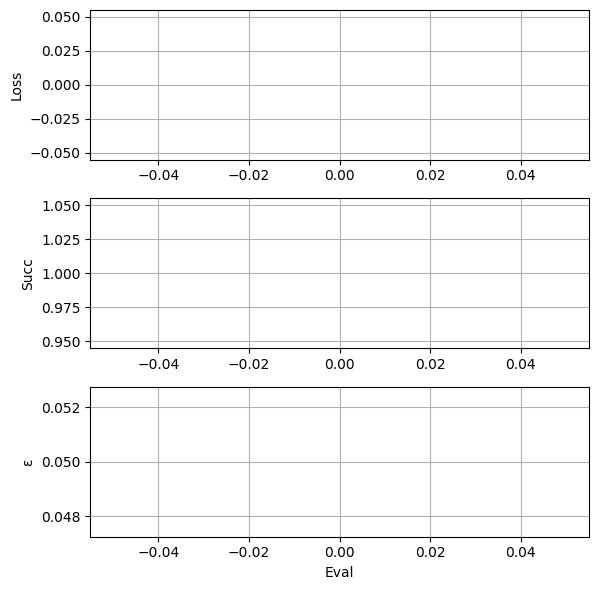


Best θ (rad):
[ 2.33   5.91   4.903  2.785  0.046  0.908  0.509  5.496  3.51   4.436
  0.145  5.909  5.477  1.16   0.189  1.493  1.447  3.409  2.625  1.648
  4.079  1.128  2.01   2.22   3.556  4.877  1.169  3.37   3.824 -0.092]


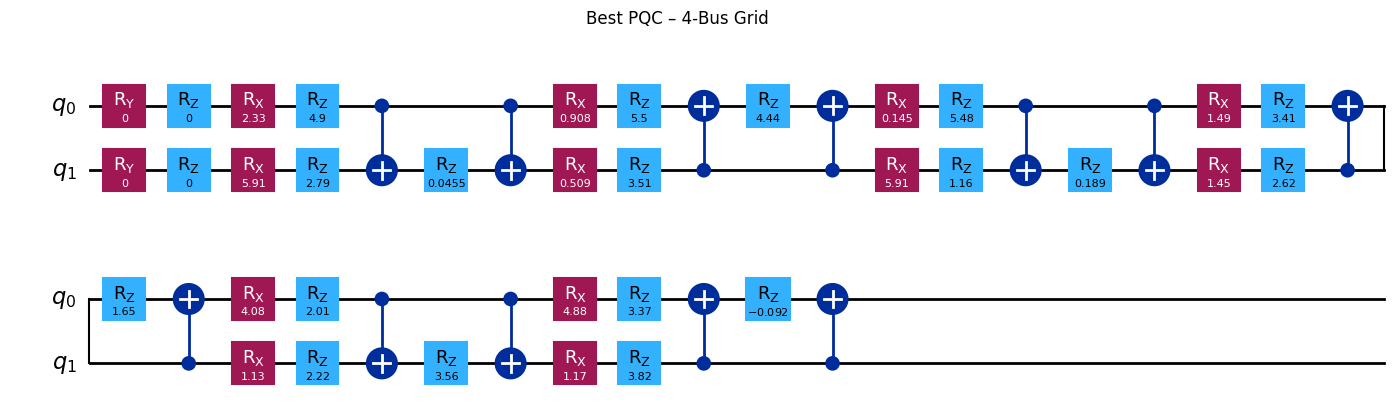

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Fast Quantum 4‑Bus Grid – CMA‑ES + Vector Env
Author : Lê Huy Hoàng – 29 Jul 2025
--------------------------------------------------------------------
• 2‑qubit HEA‑ZZ PQC (6 layer, 30 θ)
• pop 64 – 4 800 evals
• Loss = 1 – success_rate    → early‑stop khi loss = 0
"""

# === IMPORT ================================================================
import time, numpy as np, matplotlib.pyplot as plt, cma
import gymnasium as gym
import pandapower as pp, pandapower.networks as pn
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import circuit_drawer

# ╔════ HYPER ════╗
LAYER, DIM          = 6, 30
POP,  MAX_FEV       = 64, 4800
MAX_STEPS           = 2
EPS0, EPS_DEC, EPS_MIN = .05, .95, .001
ROUND_THETA         = 3
VLIM                = (0.95, 1.05)
LOAD_STEP           = 0.10
SCALE_RANGE         = (0.60, 1.10)
SEED                = 42
np.random.seed(SEED)
# ╚════════════════╝

# ---------- ENV -----------------------------------------------------------
class FourBusEnv(gym.Env):
    metadata = {"render_modes": []}
    def __init__(self, vlim=VLIM, load_step=LOAD_STEP, scale_rng=SCALE_RANGE):
        super().__init__()
        self.vmin, self.vmax = vlim
        self.load_step, self.scale_rng = load_step, scale_rng
        self.action_space  = gym.spaces.Discrete(4)
        self.observation_space = gym.spaces.Box(low=0, high=2, shape=(8,), dtype=np.float32)
        self.steps = 0

    def _randomize_loads(self):
        scale = np.random.uniform(*self.scale_rng, size=len(self.net.load))
        self.net.load[['p_mw','q_mvar']] *= scale[:,None]

    def _pf_state(self):
        try:
            pp.runpp(self.net, calculate_voltage_angles=True, trafo_model="pi")
            vm = self.net.res_bus.vm_pu.values
            va = np.deg2rad(self.net.res_bus.va_degree.values)
        except pp.LoadflowNotConverged:
            vm = np.zeros(4); va = np.zeros(4)
        return np.concatenate([vm, va]).astype(np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed); self.steps = 0
        self.net = pn.simple_four_bus_system()
        self._randomize_loads()
        obs = self._pf_state()
        return obs, {}

    def step(self, action):
        self.steps += 1
        bus = 1 if action < 2 else 2
        sign = -1 if action % 2 == 0 else +1
        idx = self.net.load[self.net.load.bus==bus].index
        self.net.load.loc[idx,['p_mw','q_mvar']] *= (1 + sign*self.load_step)
        obs = self._pf_state()
        volt = obs[:4]
        ok = (volt > self.vmin).all() and (volt < self.vmax).all()
        reward = 1.0 if ok else 0.0
        done = (self.steps >= MAX_STEPS)  # ★ cho phép 2 bước
        return obs, reward, done, False, {}

env = FourBusEnv()

# ---------- PQC & ENCODE (giữ nguyên) -------------------------------------
def encode(qc, s_int):
    r,c = divmod(int(s_int),4)
    qc.ry(r*np.pi/2,0); qc.rz(r*np.pi/2,0)
    qc.ry(c*np.pi/2,1); qc.rz(c*np.pi/2,1)

def build(theta, s_int):
    qc=QuantumCircuit(2); k=0; encode(qc,s_int)
    for l in range(LAYER):
        qc.rx(theta[k],0); qc.rx(theta[k+1],1); k+=2
        qc.rz(theta[k],0); qc.rz(theta[k+1],1); k+=2
        if l&1==0: qc.cx(0,1); qc.rz(theta[k],1); qc.cx(0,1)
        else:      qc.cx(1,0); qc.rz(theta[k],0); qc.cx(1,0)
        k+=1
    return qc

_cache={}
def probs_cached(s_int, theta):
    key=(int(s_int),tuple(np.round(theta,ROUND_THETA)))
    if key not in _cache:
        sv=Statevector.from_instruction(build(theta,s_int))
        p=np.zeros(4)
        for bits,pr in sv.probabilities_dict().items(): p[int(bits,2)]+=pr
        _cache[key]=p/p.sum()
    return _cache[key]

TH_V, TH_DA = 0.98, np.deg2rad(2)
def obs_to_int(obs):
    v,a = obs[:4], obs[4:]
    b0 = int(v[0]>TH_V); b1=int(v[1]>TH_V)
    b2 = int(abs(a[0]-a[1])>TH_DA); b3=int(abs(a[2]-a[3])>TH_DA)
    return (b0<<3)|(b1<<2)|(b2<<1)|b3

# ---------- ROLLOUT (single env) ------------------------------------------
def rollout(theta, eps):
    obs,_ = env.reset()
    succ = False
    for _ in range(MAX_STEPS):
        if np.random.rand() < eps:
            act = np.random.randint(4)
        else:
            s_int = obs_to_int(obs)
            act = np.random.choice(4, p=probs_cached(s_int, theta))
        obs, r, done, _, _ = env.step(act)
        succ |= bool(r)
        if done: break
    return 1.0 - float(succ), float(succ), env.steps

# ---------- CMA‑ES loop ---------------------------------------------------
theta0 = np.random.uniform(0,2*np.pi,DIM)
es = cma.CMAEvolutionStrategy(theta0,0.4,
        {'popsize':POP,'maxfevals':MAX_FEV,'verb_disp':0})

log = {k:[] for k in ['loss','succ','steps','eps','eval_t']}
eps = EPS0; t_start=time.perf_counter()

while not es.stop():
    t0=time.perf_counter()
    pop = es.ask()
    evals = np.array([rollout(t,eps) for t in pop])
    es.tell(pop, evals[:,0])
    log['eval_t'].append(time.perf_counter()-t0)

    i = evals[:,0].argmin()
    l,succ,st = evals[i]
    for k,v in zip(['loss','succ','steps'],[l,succ,st]): log[k].append(v)
    log['eps'].append(eps)
    print(f"{len(log['loss']):3d} | ε={eps:.3f} | loss={l:.4f} | succ={succ:.2f}")

    if l<=0:
        print(">>> Early‑stop: success_rate = 1.0!")
        break
    eps = max(eps*EPS_DEC, EPS_MIN)

best_theta = es.result.xbest
print(f"\nTrain wall‑clock {(time.perf_counter()-t_start):.1f}s | best loss {es.result.fbest:.4f}")

# ---------- PLOT & CIRCUIT ------------------------------------------------
plt.figure(figsize=(6,6))
plt.subplot(3,1,1); plt.plot(log['loss']); plt.ylabel("Loss"); plt.grid()
plt.subplot(3,1,2); plt.plot(log['succ']); plt.ylabel("Succ"); plt.grid()
plt.subplot(3,1,3); plt.plot(log['eps']);  plt.ylabel("ε");   plt.xlabel("Eval"); plt.grid()
plt.tight_layout(); plt.show()

print("\nBest θ (rad):")
np.set_printoptions(precision=3,suppress=True); print(best_theta)

fig = circuit_drawer(build(best_theta,0),output="mpl",fold=20)
fig.suptitle("Best PQC – 4‑Bus Grid");
display(fig)
